# Project 3

## Excercise 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

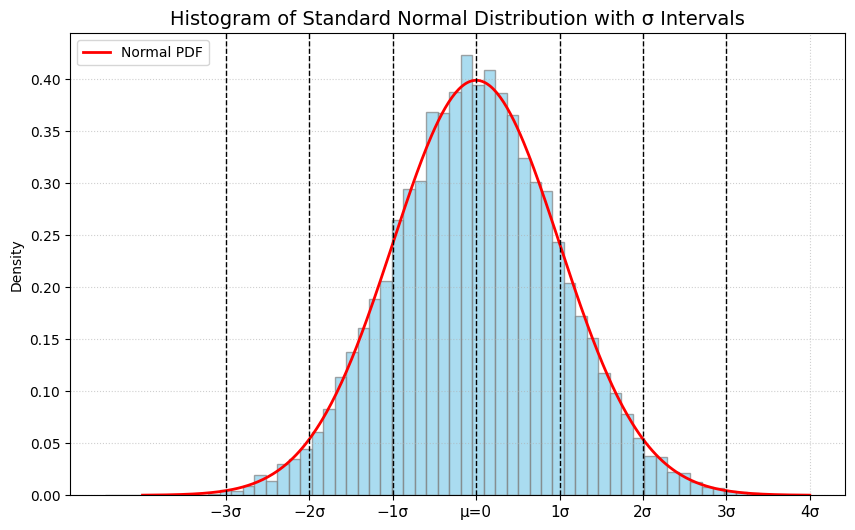

In [5]:
# --- Generate random samples from a normal distribution ---
np.random.seed(0)
n = 20000
samples = np.random.normal(loc=0.0, scale=1.0, size=n)  

# --- Plot histogram of samples ---
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(samples, bins=60, density=True, alpha=0.7, color='skyblue', edgecolor='gray')

# --- Overlay the true normal probability density function (PDF) - not necessary---
x = np.linspace(-4, 4, 400)
pdf = (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)
plt.plot(x, pdf, 'r-', linewidth=2, label='Normal PDF')

# --- Mark σ intervals (standard deviation lines) ---
sigma_lines = [-3, -2, -1, 0, 1, 2, 3] # cause std =1 so 1 sigma = 1
for s in sigma_lines:
    plt.axvline(s, color='k', linestyle='--', linewidth=1)

# --- Custom tick labels ---
tick_positions = [-3, -2, -1, 0, 1, 2, 3, 4]
tick_labels = ['−3σ', '−2σ', '−1σ', 'μ=0', '1σ', '2σ', '3σ', '4σ']
plt.xticks(tick_positions, tick_labels, fontsize=11)

# --- Add labels and title ---
plt.title("Histogram of Standard Normal Distribution with σ Intervals", fontsize=14)
plt.ylabel("Density")
plt.legend()


plt.grid(True, linestyle=':', alpha=0.6)
plt.show()


## Excercise 2

**Pareto rule** (in other words **80/20 rule**) says that about 20% of the population accounts for 80% of the total effect.
We try to show the right of this rule by:
1. Generate random samples from a geometric distribution
2. Sort values (descending)
3. Compute cumulative contribution
4. Check if ~20% of the largest values contribute ~80% of the total sum
5. Visualize it using a Lorenz curve or cumulative plot.

p=0.3: Approx. 51.24% of the top samples account for 80% of the total value.


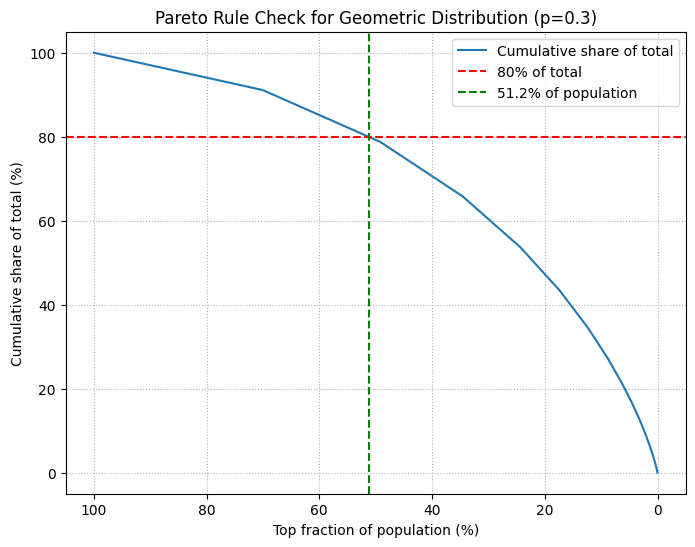

p=0.5: Approx. 60.13% of the top samples account for 80% of the total value.


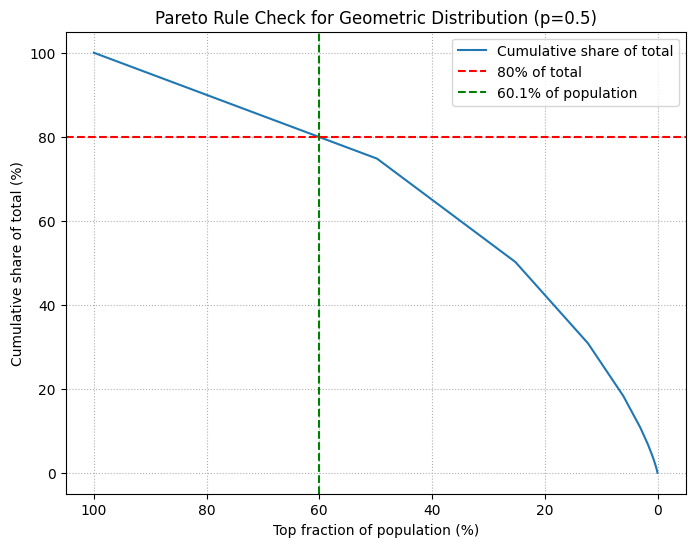

p=0.7: Approx. 71.21% of the top samples account for 80% of the total value.


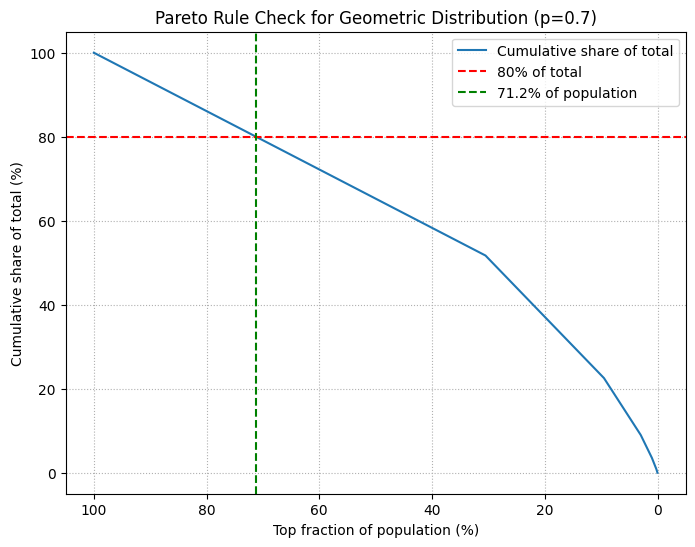

In [8]:
import numpy as np
import matplotlib.pyplot as plt

for i in (0.3, 0.5, 0.7):
    # --- Parameters ---
    p = i        # probability of success
    n = 10000    # number of samples

    # --- Generate samples from geometric distribution ---
    samples = np.random.geometric(p, size=n)

    # --- Sort samples descending ---
    sorted_samples = np.sort(samples)[::-1]

    # --- Compute cumulative sums ---
    cumulative_sum = np.cumsum(sorted_samples)
    total_sum = cumulative_sum[-1]
    cumulative_share = cumulative_sum / total_sum

    # --- Corresponding population share (from largest to smallest) ---
    population_share = np.arange(1, n + 1) / n

    # --- Find point where 80% of value is reached ---
    threshold_index = np.argmax(cumulative_share >= 0.8)
    pareto_population = population_share[threshold_index] * 100

    print(f"p={p}: Approx. {pareto_population:.2f}% of the top samples account for 80% of the total value.")

    # --- Plot cumulative contribution (Pareto curve) ---
    plt.figure(figsize=(8, 6))
    plt.plot(population_share * 100, cumulative_share * 100, label='Cumulative share of total')
    plt.axhline(80, color='r', linestyle='--', label='80% of total')
    plt.gca().invert_xaxis()
    plt.axvline(pareto_population, color='g', linestyle='--', label=f'{pareto_population:.1f}% of population')
    plt.title(f"Pareto Rule Check for Geometric Distribution (p={p})")
    plt.xlabel("Top fraction of population (%)")
    plt.ylabel("Cumulative share of total (%)")
    plt.legend()
    plt.grid(True, linestyle=':')
    plt.show()


**We see that for geometric distribution Pareto rule is not true. Why? In practice, Pareto rule applies to highly asymmetric, heavy-tailed distributions – such as Pareto (hence the name).**

## Excercise 3

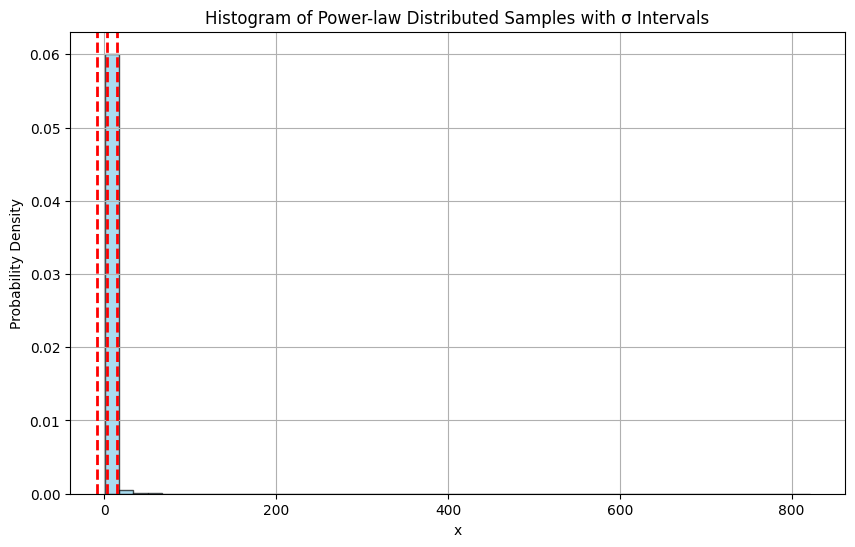

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 2.5      # shape parameter
x_min = 1.0      # minimum x
n_samples = 10000  # number of random samples

# Generate power-law distributed samples using inverse transform sampling
u = np.random.rand(n_samples)
x = x_min * (1 - u)**(-1/(alpha - 1))

# Compute mean and standard deviation
mean_x = np.mean(x)
std_x = np.std(x)

# Define sigma intervals
sigma_intervals = [mean_x - std_x, mean_x, mean_x + std_x]

# Plot histogram
plt.figure(figsize=(10,6))
counts, bins, patches = plt.hist(x, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')

# Mark sigma intervals
for sigma in sigma_intervals:
    plt.axvline(sigma, color='red', linestyle='--', linewidth=2)
    
plt.title('Histogram of Power-law Distributed Samples with σ Intervals')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()


Ohhh... significant discrepancies, better let's draw it in logarytmic scale

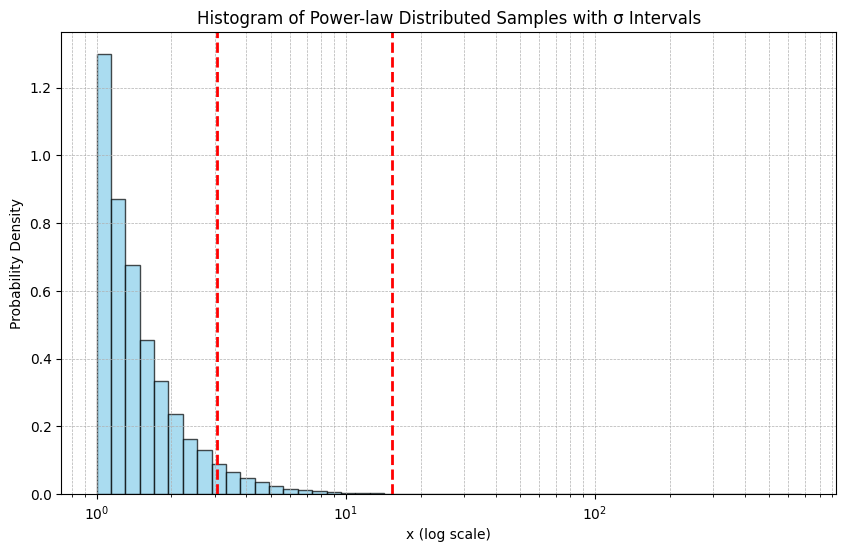

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 2.5      # shape parameter
x_min = 1.0      # minimum x
n_samples = 10000  # number of random samples

# Generate power-law distributed samples
u = np.random.rand(n_samples)
x = x_min * (1 - u)**(-1/(alpha - 1))

# Compute mean and standard deviation
mean_x = np.mean(x)
std_x = np.std(x)

# Define sigma intervals
sigma_intervals = [mean_x - std_x, mean_x, mean_x + std_x]

# Use logarithmic bins for better visualization
bins = np.logspace(np.log10(x_min), np.log10(x.max()), 50)

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(x, bins=bins, density=True, alpha=0.7, color='skyblue', edgecolor='black')

# Mark sigma intervals
for sigma in sigma_intervals:
    plt.axvline(sigma, color='red', linestyle='--', linewidth=2)

plt.xscale('log')  # log scale for x-axis
plt.title('Histogram of Power-law Distributed Samples with σ Intervals')
plt.xlabel('x (log scale)')
plt.ylabel('Probability Density')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


We got: a heavy-tailed distribution - most of the values cluster near x_min (small values), and a few rare values are very large.

## Excercise 4

s=1.5: Approx. 8.65% of the top samples account for 80% of the total value.


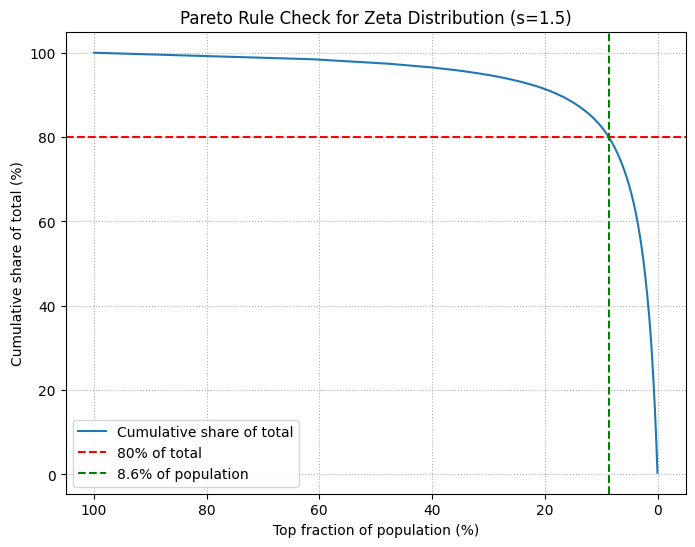

s=2.0: Approx. 22.59% of the top samples account for 80% of the total value.


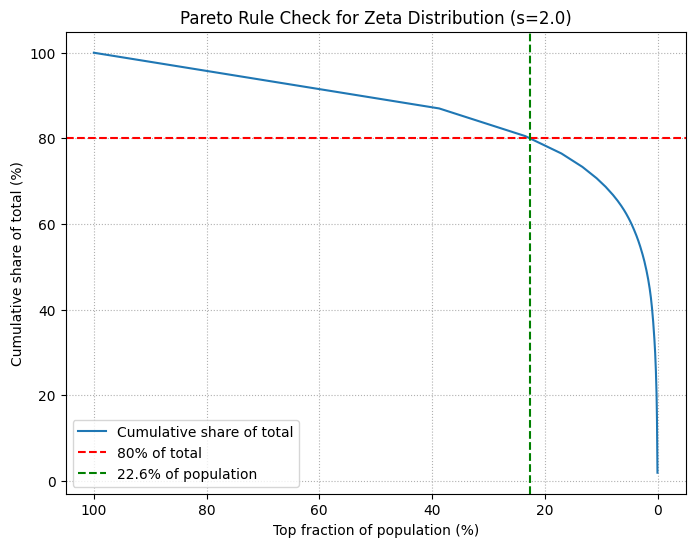

s=2.5: Approx. 61.48% of the top samples account for 80% of the total value.


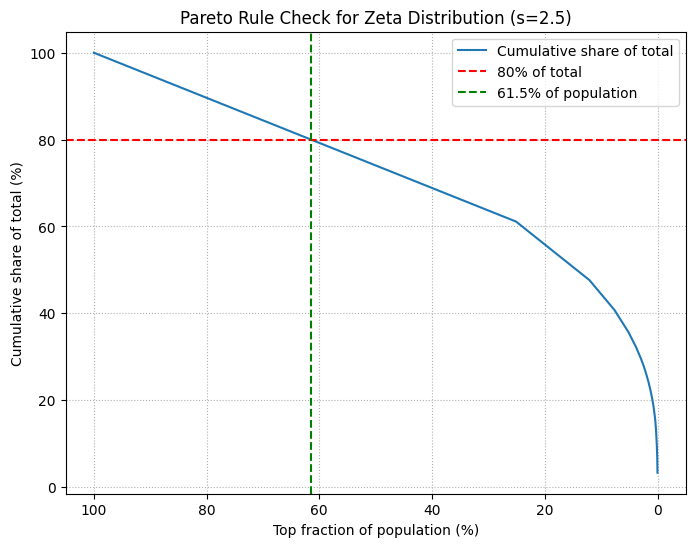

s=3.0: Approx. 72.49% of the top samples account for 80% of the total value.


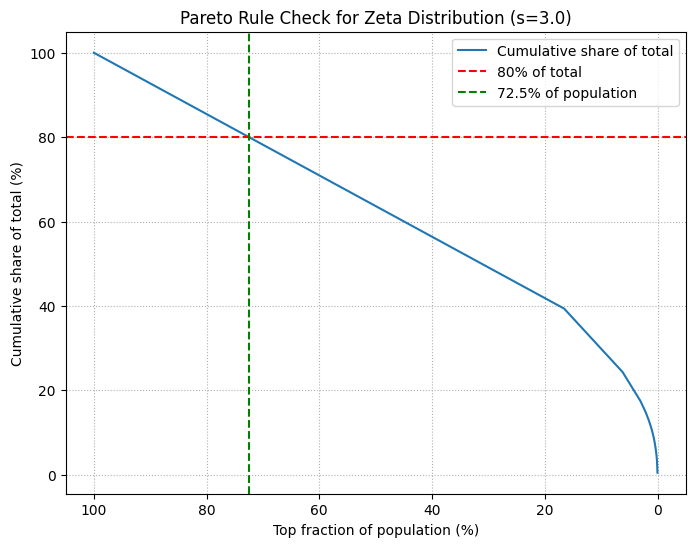

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import zeta

# --- Function to sample Zeta-distributed values ---
def sample_zeta(s, K_max, N):
    k = np.arange(1, K_max + 1)
    pk = k**(-s) / zeta(s, 1)      # discrete Zeta probabilities
    pk = pk / pk.sum()              # normalize
    samples = np.random.choice(k, size=N, p=pk)
    return samples

# --- Parameters ---
s_values = [1.5, 2.0, 2.5, 3.0]  # different Zeta exponents
N = 10000
K_max = 1000

for s in s_values:
    # --- Generate Zeta samples ---
    samples = sample_zeta(s, K_max, N)

    # --- Sort samples descending ---
    sorted_samples = np.sort(samples)[::-1]

    # --- Compute cumulative sums ---
    cumulative_sum = np.cumsum(sorted_samples)
    total_sum = cumulative_sum[-1]
    cumulative_share = cumulative_sum / total_sum

    # --- Corresponding population share (from largest to smallest) ---
    population_share = np.arange(1, N + 1) / N

    # --- Find point where 80% of value is reached ---
    threshold_index = np.argmax(cumulative_share >= 0.8)
    pareto_population = population_share[threshold_index] * 100

    print(f"s={s}: Approx. {pareto_population:.2f}% of the top samples account for 80% of the total value.")

    # --- Plot cumulative contribution (Pareto curve) ---
    plt.figure(figsize=(8, 6))
    plt.plot(population_share * 100, cumulative_share * 100, label='Cumulative share of total')
    plt.axhline(80, color='r', linestyle='--', label='80% of total')
    plt.gca().invert_xaxis()  # top fraction on left
    plt.axvline(pareto_population, color='g', linestyle='--', label=f'{pareto_population:.1f}% of population')
    plt.title(f"Pareto Rule Check for Zeta Distribution (s={s})")
    plt.xlabel("Top fraction of population (%)")
    plt.ylabel("Cumulative share of total (%)")
    plt.legend()
    plt.grid(True, linestyle=':')
    plt.show()



## Excercise 5

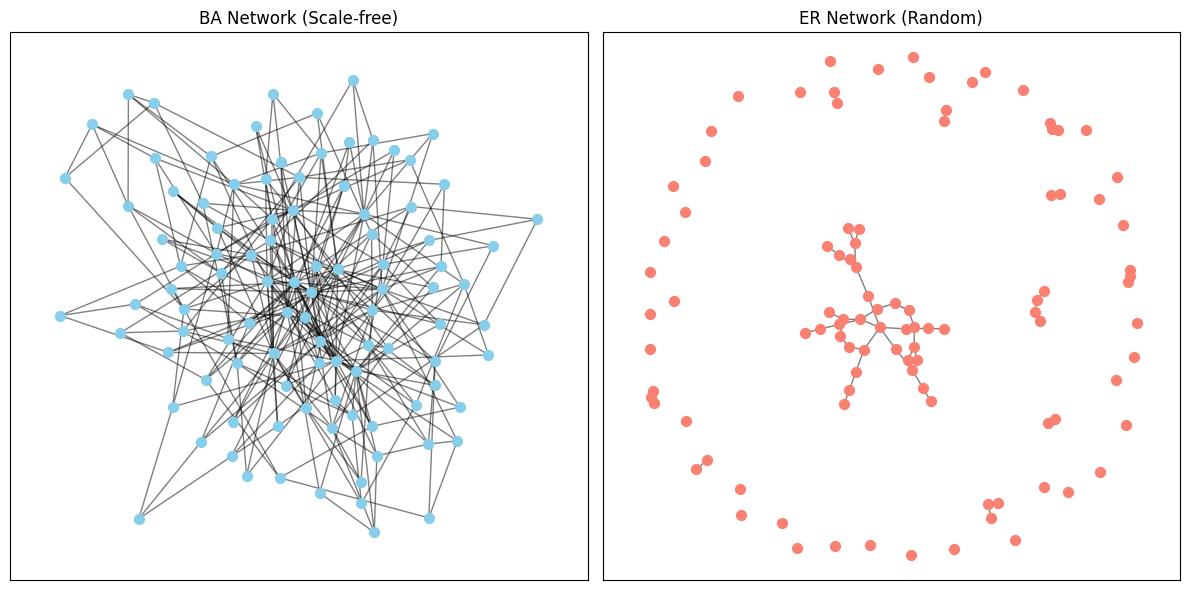

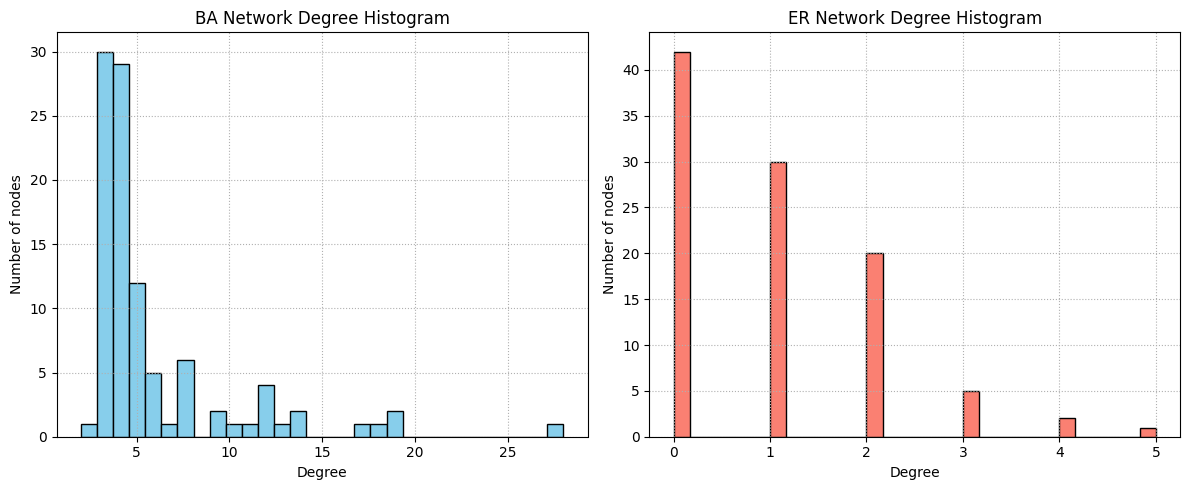

BA Network: Mean degree = 5.82 , Variance = 19.027600000000003
ER Network: Mean degree = 0.98 , Variance = 1.1596


In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# --- Parameters ---
N = 100    # number of nodes
m = 3        # edges to attach for BA model
p = 0.01     # probability for ER model

# --- Generate Barabási–Albert (BA) network ---
ba_graph = nx.barabasi_albert_graph(N, m)

# --- Generate Erdős–Rényi (ER) network ---
er_graph = nx.erdos_renyi_graph(N, p)

# --- Compute vertex degrees ---
ba_degrees = np.array([d for n, d in ba_graph.degree()])
er_degrees = np.array([d for n, d in er_graph.degree()])

# --- Draw BA network ---
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
pos = nx.spring_layout(ba_graph, seed=42)  # force-directed layout
nx.draw_networkx_nodes(ba_graph, pos, node_size=50, node_color='skyblue')
nx.draw_networkx_edges(ba_graph, pos, alpha=0.5)
plt.title("BA Network (Scale-free)")

# --- Draw ER network ---
plt.subplot(1, 2, 2)
pos = nx.spring_layout(er_graph, seed=42)
nx.draw_networkx_nodes(er_graph, pos, node_size=50, node_color='salmon')
nx.draw_networkx_edges(er_graph, pos, alpha=0.5)
plt.title("ER Network (Random)")

plt.tight_layout()
plt.show()

# --- Plot histograms ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(ba_degrees, bins=30, color='skyblue', edgecolor='black')
plt.title("BA Network Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.grid(True, linestyle=':')

plt.subplot(1, 2, 2)
plt.hist(er_degrees, bins=30, color='salmon', edgecolor='black')
plt.title("ER Network Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.grid(True, linestyle=':')

plt.tight_layout()
plt.show()

# --- Compute expectation and variance ---
ba_mean = np.mean(ba_degrees)
ba_var = np.var(ba_degrees)
er_mean = np.mean(er_degrees)
er_var = np.var(er_degrees)

print("BA Network: Mean degree =", ba_mean, ", Variance =", ba_var)
print("ER Network: Mean degree =", er_mean, ", Variance =", er_var)


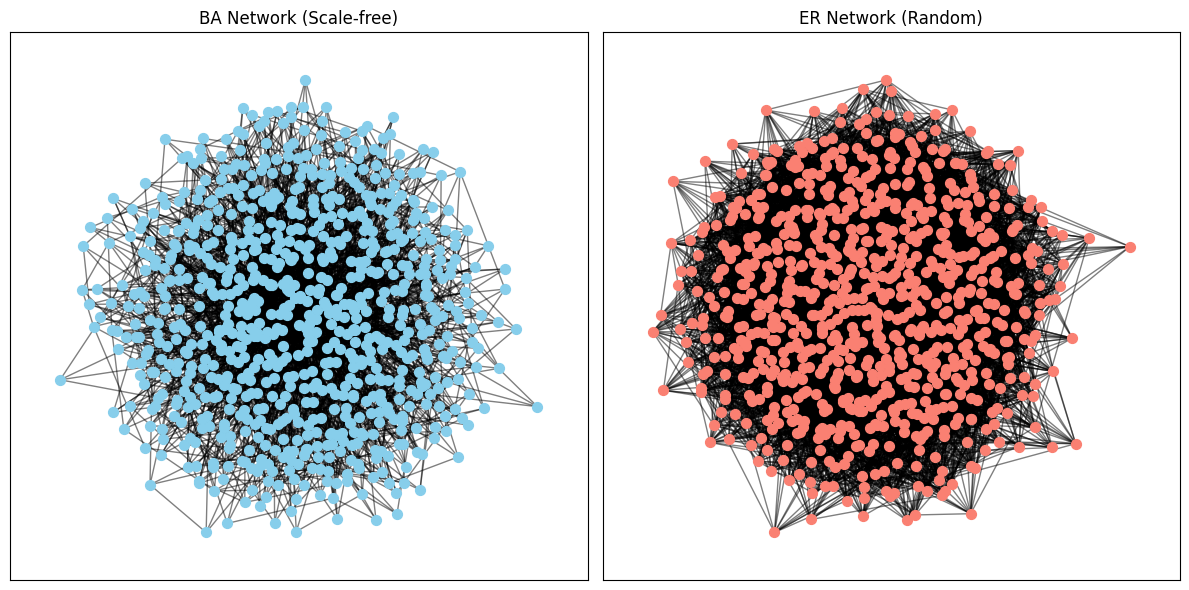

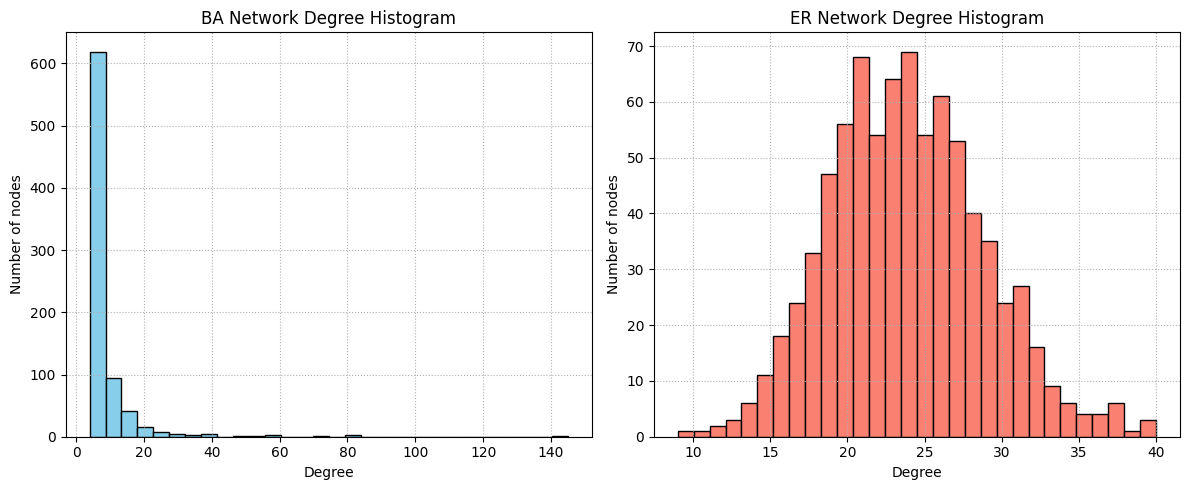

BA Network: Mean degree = 7.96 , Variance = 80.7009
ER Network: Mean degree = 23.8925 , Variance = 23.553443750000007


In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# --- Parameters ---
N = 800    # number of nodes
m = 4        # edges to attach for BA model
p = 0.03     # probability for ER model

# --- Generate Barabási–Albert (BA) network ---
ba_graph = nx.barabasi_albert_graph(N, m)

# --- Generate Erdős–Rényi (ER) network ---
er_graph = nx.erdos_renyi_graph(N, p)

# --- Compute vertex degrees ---
ba_degrees = np.array([d for n, d in ba_graph.degree()])
er_degrees = np.array([d for n, d in er_graph.degree()])

# --- Draw BA network ---
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
pos = nx.spring_layout(ba_graph, seed=42)  # force-directed layout
nx.draw_networkx_nodes(ba_graph, pos, node_size=50, node_color='skyblue')
nx.draw_networkx_edges(ba_graph, pos, alpha=0.5)
plt.title("BA Network (Scale-free)")

# --- Draw ER network ---
plt.subplot(1, 2, 2)
pos = nx.spring_layout(er_graph, seed=42)
nx.draw_networkx_nodes(er_graph, pos, node_size=50, node_color='salmon')
nx.draw_networkx_edges(er_graph, pos, alpha=0.5)
plt.title("ER Network (Random)")

plt.tight_layout()
plt.show()

# --- Plot histograms ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(ba_degrees, bins=30, color='skyblue', edgecolor='black')
plt.title("BA Network Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.grid(True, linestyle=':')

plt.subplot(1, 2, 2)
plt.hist(er_degrees, bins=30, color='salmon', edgecolor='black')
plt.title("ER Network Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.grid(True, linestyle=':')

plt.tight_layout()
plt.show()

# --- Compute expectation and variance ---
ba_mean = np.mean(ba_degrees)
ba_var = np.var(ba_degrees)
er_mean = np.mean(er_degrees)
er_var = np.var(er_degrees)

print("BA Network: Mean degree =", ba_mean, ", Variance =", ba_var)
print("ER Network: Mean degree =", er_mean, ", Variance =", er_var)


BA network (scale-free):
* Follows a power-law degree distribution.
* Most nodes have a small degree, but a few nodes (hubs) have very high degree.
* This results in a heavy-tailed histogram.
* Heterogenous

ER network (random):
* F*ollows a binomial/Poisson degree distribution (for large N).
* Most nodes have degree close to the mean, very few extremes.
* Histogram is bell-shaped; no significant hubs.
* Homogenous

# GRAPH VISUALIZATION METHODS

## 1) pre-defined graphs and layouts

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
# Przykład: sieć współautorstwa z NetworkX
G = nx.karate_club_graph()
help(nx.spring_layout) # documentation

Help on function spring_layout in module networkx.drawing.layout:

spring_layout(G, k=None, pos=None, fixed=None, iterations=50, threshold=0.0001, weight='weight', scale=1, center=None, dim=2, seed=None)
    Position nodes using Fruchterman-Reingold force-directed algorithm.
    
    The algorithm simulates a force-directed representation of the network
    treating edges as springs holding nodes close, while treating nodes
    as repelling objects, sometimes called an anti-gravity force.
    Simulation continues until the positions are close to an equilibrium.
    
    There are some hard-coded values: minimal distance between
    nodes (0.01) and "temperature" of 0.1 to ensure nodes don't fly away.
    During the simulation, `k` helps determine the distance between nodes,
    though `scale` and `center` determine the size and place after
    rescaling occurs at the end of the simulation.
    
    Fixing some nodes doesn't allow them to move in the simulation.
    It also turns off th

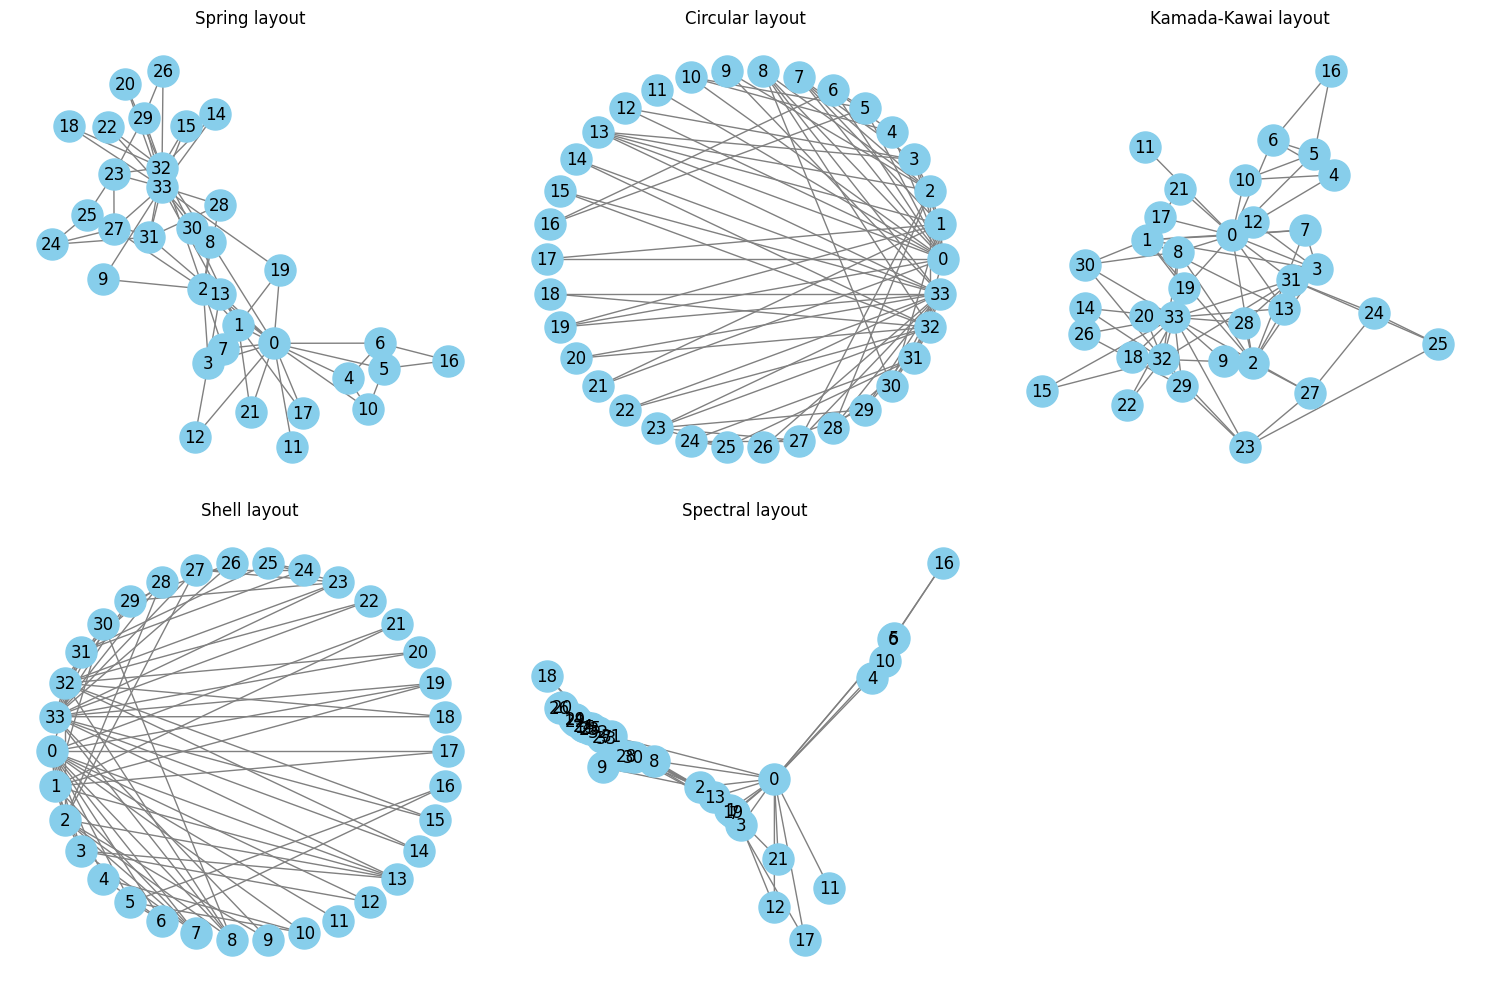

In [22]:
layouts = {
    "Spring layout": nx.spring_layout,
    "Circular layout": nx.circular_layout,
    "Kamada-Kawai layout": nx.kamada_kawai_layout,
    "Shell layout": nx.shell_layout,
    "Spectral layout": nx.spectral_layout
}

plt.figure(figsize=(15, 10))

for i, (name, layout_func) in enumerate(layouts.items(), 1):
    plt.subplot(2, 3, i)
    pos = layout_func(G)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray")
    plt.title(name)

plt.tight_layout()
plt.show()

## 3) Implementation of the graph visualization based on the spring method

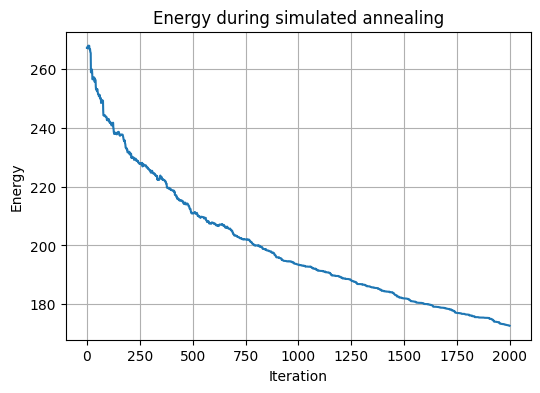

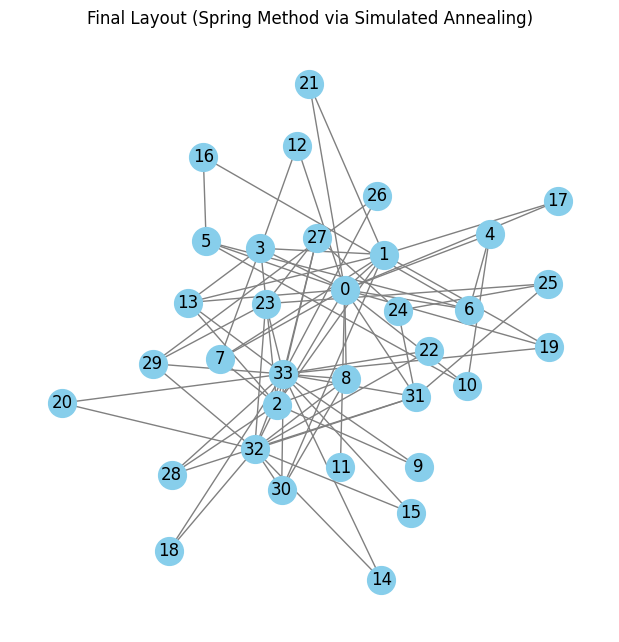

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# --- PARAMETERS ---
np.random.seed(42)
N_STEPS = 2000
TEMP_START = 1.0
TEMP_END = 0.001
SPRING_LENGTH = 1.0
SPRING_K = 0.1      # spring constant
CHARGE_K = 1.0      # Coulomb repulsion constant

# --- Graph ---
G = nx.karate_club_graph()
N = len(G.nodes)
positions = np.random.rand(N, 2) * 10  # random initial positions

# --- Energy function ---           here we used AI to create optimization function
def total_energy(pos):
    energy = 0.0
    # Repulsive energy (Coulomb)
    for i in range(N):
        for j in range(i+1, N):
            diff = pos[i] - pos[j]
            dist = np.linalg.norm(diff) + 1e-6
            energy += CHARGE_K / dist
    # Attractive energy (springs)
    for (i, j) in G.edges:
        diff = pos[i] - pos[j]
        dist = np.linalg.norm(diff)
        energy += 0.5 * SPRING_K * (dist - SPRING_LENGTH)**2
    return energy

# --- Simulated annealing ---
def simulated_annealing(pos, steps=N_STEPS):
    positions = pos.copy()
    energy_history = []
    for step in range(steps):
        T = TEMP_START * (TEMP_END / TEMP_START) ** (step / steps)  # exponential cooling
        i = np.random.randint(N)
        old_pos = positions[i].copy()
        old_energy = total_energy(positions)

        # Propose small random move
        positions[i] += np.random.normal(scale=0.2, size=2)
        new_energy = total_energy(positions)

        # Accept with probability
        dE = new_energy - old_energy
        if dE > 0 and np.random.rand() > np.exp(-dE / T):
            positions[i] = old_pos  # reject move

        energy_history.append(total_energy(positions))
    return positions, energy_history

# --- Run optimization ---
final_pos, energy = simulated_annealing(positions)

# --- Plot energy decay ---
plt.figure(figsize=(6,4))
plt.plot(energy)
plt.title("Energy during simulated annealing")
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.grid(True)
plt.show()

# --- Plot final configuration ---
plt.figure(figsize=(6,6))
nx.draw(G, pos={i: final_pos[i] for i in range(N)}, with_labels=True,
        node_size=400, node_color='skyblue', edge_color='gray')
plt.title("Final Layout (Spring Method via Simulated Annealing)")
plt.show()


Final energy: 119.46961910076237


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


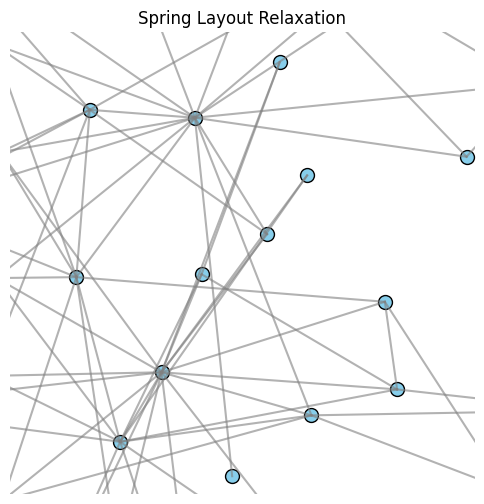

In [25]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# --- Parameters ---
np.random.seed(42)
SPRING_LENGTH = 1.0
SPRING_K = 0.05      # spring constant
CHARGE_K = 1.0       # Coulomb repulsion constant
N_STEPS = 500
STEP_SIZE = 0.1

# --- Graph (you can replace this with any graph) ---
G = nx.karate_club_graph()
N = len(G.nodes)
positions = np.random.rand(N, 2) * 10  # random initial positions

# --- Compute total energy (for info) ---
def total_energy(pos):
    energy = 0.0
    # Repulsive term (Coulomb)
    for i in range(N):
        for j in range(i+1, N):
            diff = pos[i] - pos[j]
            dist = np.linalg.norm(diff) + 1e-6
            energy += CHARGE_K / dist
    # Spring term (edges)
    for (i, j) in G.edges:
        diff = pos[i] - pos[j]
        dist = np.linalg.norm(diff)
        energy += 0.5 * SPRING_K * (dist - SPRING_LENGTH)**2
    return energy

# --- Compute force on each node ---
def compute_forces(pos):
    forces = np.zeros_like(pos)
    # Repulsive forces
    for i in range(N):
        for j in range(i+1, N):
            diff = pos[i] - pos[j]
            dist = np.linalg.norm(diff) + 1e-6
            f = CHARGE_K * diff / (dist**3)
            forces[i] += f
            forces[j] -= f
    # Spring forces (edges)
    for (i, j) in G.edges:
        diff = pos[i] - pos[j]
        dist = np.linalg.norm(diff) + 1e-6
        f = -SPRING_K * (dist - SPRING_LENGTH) * diff / dist
        forces[i] += f
        forces[j] -= f
    return forces

# --- Update positions iteratively (like gradient descent with cooling) ---
frames = []
for step in range(N_STEPS):
    forces = compute_forces(positions)
    # Add small noise and decay step size (simulated annealing effect)
    temperature = 1.0 - step / N_STEPS
    positions += STEP_SIZE * temperature * forces + np.random.normal(0, 0.01, positions.shape)
    frames.append(positions.copy())

print("Final energy:", total_energy(positions))

# --- Create animation ---
fig, ax = plt.subplots(figsize=(6,6))
edges = list(G.edges)
sc = ax.scatter([], [], s=100, color='skyblue')

def init():
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    return []

def update(frame):
    ax.clear()
    pos = frame
    # Draw edges
    for (i,j) in edges:
        ax.plot([pos[i,0], pos[j,0]], [pos[i,1], pos[j,1]], color='gray', alpha=0.6)
    # Draw nodes
    ax.scatter(pos[:,0], pos[:,1], s=100, color='skyblue', edgecolor='k')
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    ax.set_title("Spring Layout Relaxation")
    return []

ani = FuncAnimation(fig, update, frames=frames, init_func=init, interval=50, repeat=False)

# --- Save as GIF ---
ani.save("spring_layout_simulation.gif", writer=PillowWriter(fps=20))
plt.show()
